# Micro Credit Loan Case

Problem Statement:
Indonesian Telecom industry has tied-up with MFIs to provide micro-credit on mobile balances to be paid back in 5 days. The target group is low-income families and poor customers. In order to improve the selection of customers for the credit, we need some predictions that could help them in further investment and improvement in selection of customers. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days.

Importing required Libraries

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

loading the dataset

In [2]:
data=pd.read_csv('Microcredit.csv')
data

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

            pdate  
0       7/20/2016  
1       8/10/2016  
2       8/19/2016  
3        6/6/2016  
4       6/22/2016  
...           ...  
209588  6/17/2016  
209589  6/12/2016  
209590  7/29/2016  
209591  7/25/2016  
209592   7/7/2016  

[209593 rows x 37 columns]

In [3]:
ds=pd.DataFrame(data=data)

# EDA

In [4]:
ds.shape

(209593, 37)

There are 209593 rows and 37 columns in the dataset

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
# Handeling the categorical Varibales
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
list1=['pcircle']     
for val in list1:
    ds[val] = le.fit_transform(ds[val].astype(str))
ds

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000        0   
1                    12                 0.0   0.000000   0.000000        0   
2                     6                 0.0   0.000000   0.000000        0   
3                     6                 0.0   0.000000   0.000000        0   
4                     6                 0.0   2.333333   2.333333        0   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000        0   
209589                6                 0.0   1.000000   1.000000        0   
209590               12                 0.0   4.000000   3.833333        0   
209591               12                 0.0   0.000000  10.500000        0   
209592               12                 0.0   0.000000   0.000000        0   

            pdate  
0       7/20/2016  
1       8/10/2016  
2       8/19/2016  
3        6/6/2016  
4       6/22/2016  
...           ...  
209588  6/17/2016  
209589  6/12/2016  
209590  7/29/2016  
209591  7/25/2016  
209592   7/7/2016  

[209593 rows x 37 columns]

In [7]:
ds.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

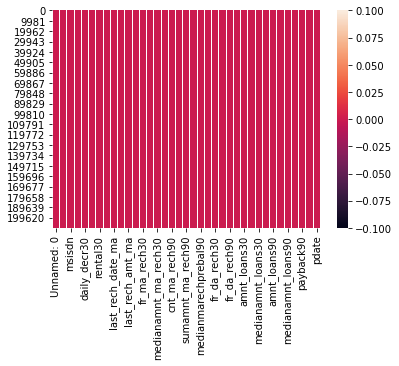

In [8]:
sns.heatmap(ds.isnull())

There is no null value in the dataset

# Summary Statistics

In [9]:
ds.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755200  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000       209593.00000   
mean     6082.515068    2692.581910    3483.406534         3755.84780   
std     10918.812767    4308.586781    5770.461279        53905.89223   
min       -93.012667  -23737.140000  -24720.580000          -29.00000   
25%        42.692000     280.420000     300.260000            1.00000   
50%      1500.000000    1083.570000    1334.000000            3.00000   
75%      7802.790000    3356.940000    4201.790000            7.00000   
max    320630.000000  198926.110000  200148.110000       998650.37770   

       last_rech_date_da  last_rech_amt_ma  ...   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000   
mean         3712.202921       2064.452797  ...      17.952021   
std         53374.833430       2370.786034  ...      17.379741   
min           -29.000000          0.000000  ...       0.000000   
25%             0.000000        770.000000  ...       6.000000   
50%             0.000000       1539.000000  ...      12.000000   
75%             0.000000       2309.000000  ...      24.000000   
max        999171.809400      55000.000000  ...     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560860            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean          6.703134            0.046077       3.398826       4.321485   
std           2.103864            0.200692       8.813729      10.308108   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       0.000000       0.000000   
50%           6.000000            0.000000       0.000000       1.666667   
75%           6.000000            0.000000       3.750000       4.500000   
max          12.000000            3.000000     171.500000     171.500000   

        pcircle  
count  209593.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0  

[8 rows x 35 columns]

From the table above it can be seen that the columns medianamnt_loans30,medianamnt_loans90,misdn,pcircle,pdate are not contributing to the data we can remove it.there mean, median values are almost zero. 
2)There is large diifernce between mean and median(50%)  in almost  all of the column 3)Thers is large  differnce too between the values of 75% aand max for all the columns.
**above observations show that there are outliers and sknweness in the dataset.

In [10]:
# droping the column from dataset
ds.drop(['medianamnt_loans90','medianamnt_loans30','msisdn','pdate','pcircle','Unnamed: 0'],axis=1,inplace=True)

In [11]:
# ploting graph for alll the coulmns in one go
#sns.displot(ds)

<AxesSubplot:xlabel='label', ylabel='count'>

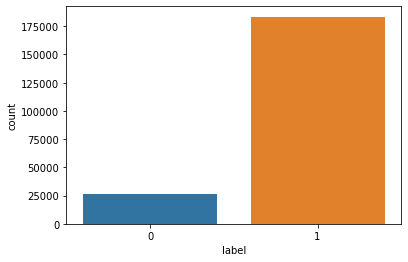

In [12]:
sns.countplot(x='label',data=ds)

The graph shows there is class imbalnce in the data set.

<AxesSubplot:>

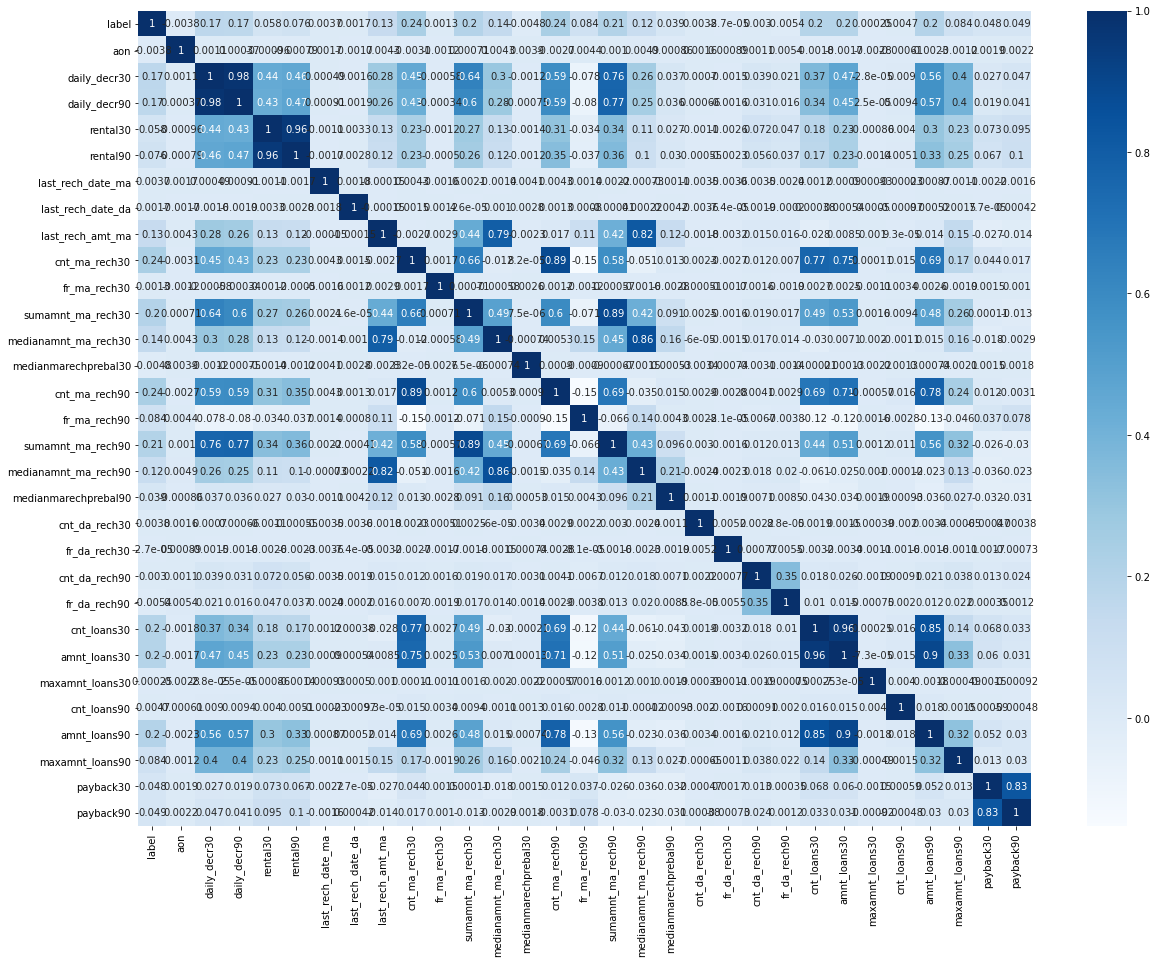

In [13]:
# Correlation Matrix ---Pearson Methos
fig =plt.figure(figsize=(20,15))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Blues')

1) the graph shows there is strong positive relation between these pairs of varibales:
    (daily_decr30 &daily_decr90),(rental30 & rental90),(cnt_loans30 & amnt_loans30),(payback30 &payback90).

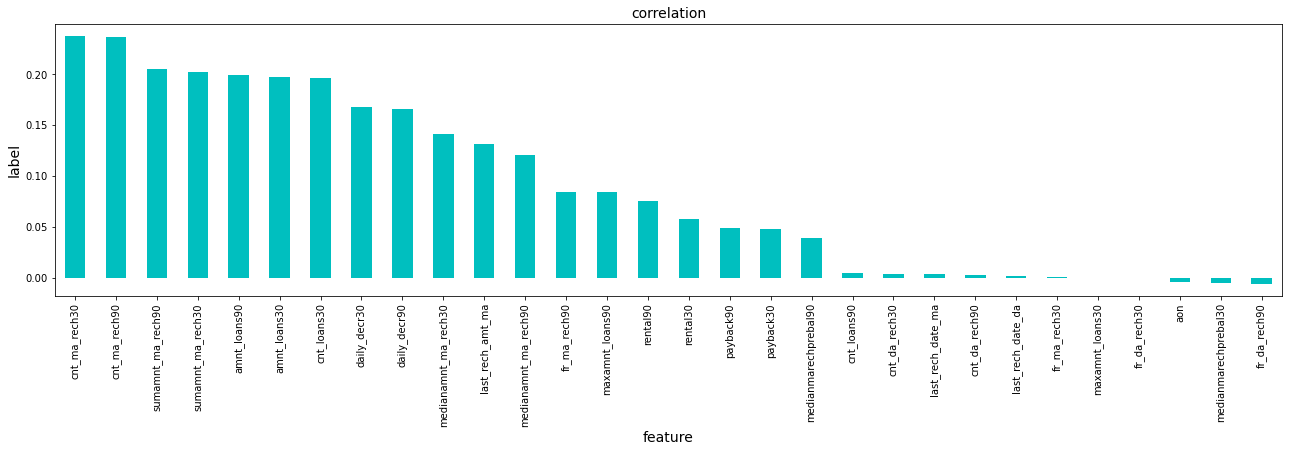

In [18]:
plt.figure(figsize=(22,5))
ds.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('label',fontsize=14)
plt.title('correlation',fontsize =14)
plt.show()

we can see the above grapgh cnt_ma_rech30,cnt_ma_rech90,daily_decr30,daily_decr90,last_rech_amt_ma        
cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30 are the most strongly correlated to the label.

In [16]:
#sns.pairplot(ds)

In [17]:
corr_matrix=ds.corr()
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianmarechprebal90    0.039300
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon                    -0.003785
medianmarechprebal30   -0.004829
fr_da_rech

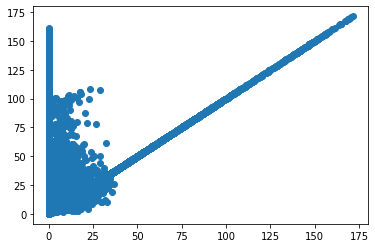

In [22]:
plt.scatter(ds['payback30'],ds['payback90'])

there is postive and direct relashionship between payback30 & payback90

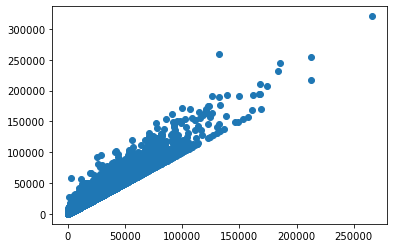

In [19]:
plt.scatter(ds['daily_decr30'],ds['daily_decr90'])

There is strong and positive relation between daily_decr30 &  daily_decr90

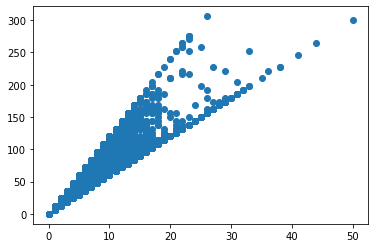

In [20]:
plt.scatter(ds['cnt_loans30'],ds['amnt_loans30'])

There is positive and strong relationship between 

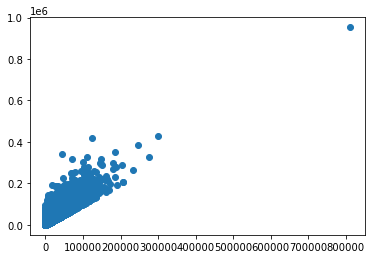

In [21]:
plt.scatter(ds['sumamnt_ma_rech30'],ds['sumamnt_ma_rech90'])

There is weak relationship between sumamnt_ma_rech30 & sumamnt_ma_rech90'

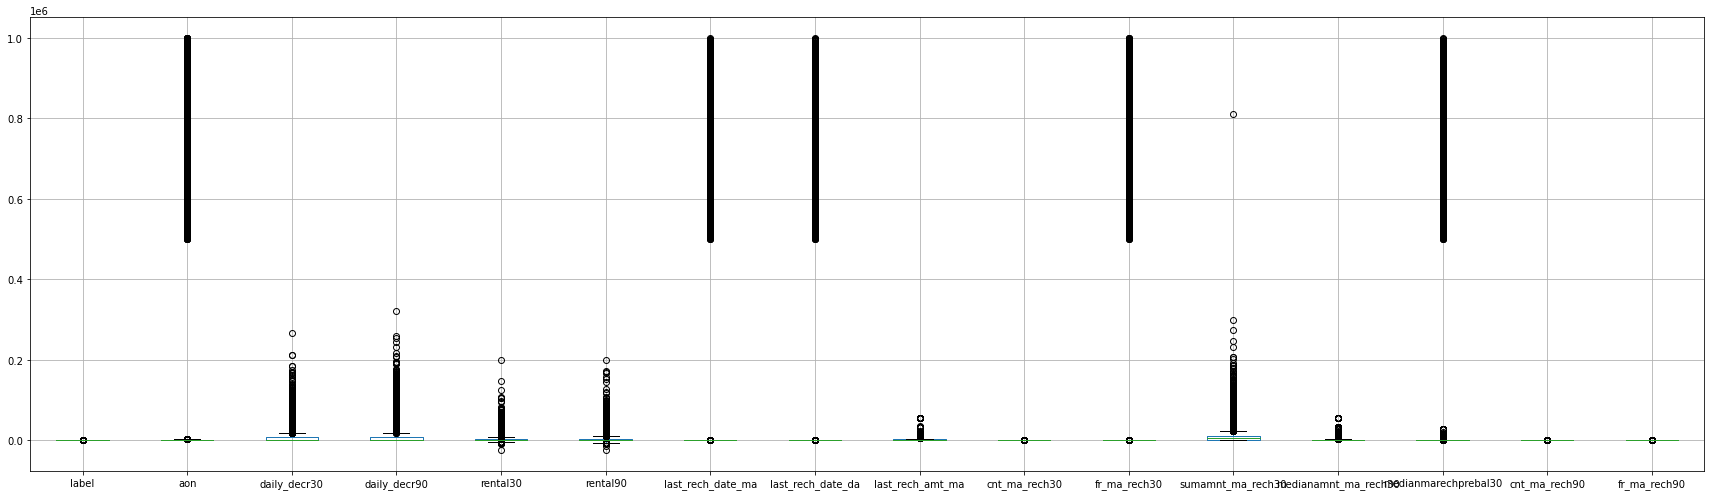

In [22]:
#As there are no null values in data, we can proceed with the next steps.
#Detecting Outliers
# Box plot for all coulmns
ds.iloc[:,0:16].boxplot(figsize=[30,10])
plt.subplots_adjust(bottom=0.25)
plt.show()
#ds.plot(kind='box',subplots=True,layout=(2,33))

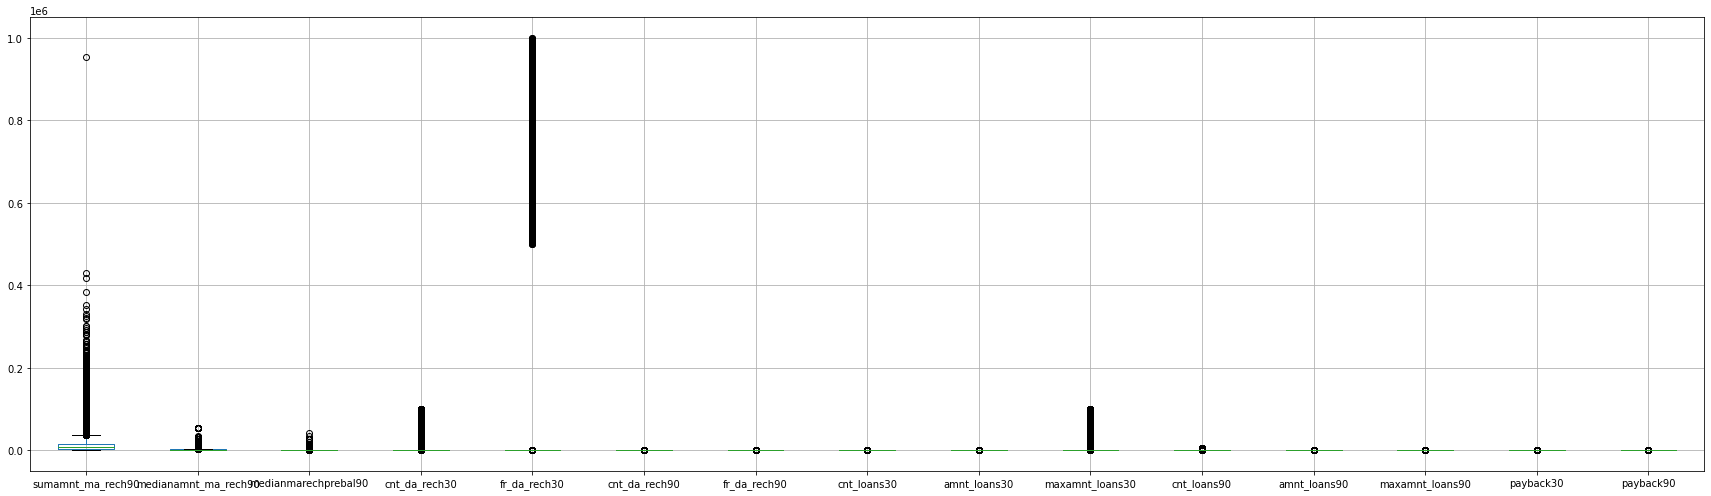

In [23]:
ds.iloc[:,16:].boxplot(figsize=[30,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

From the above figures we can se3 there are outliers in aon,daily_decr30,daily_decr90,sumamnt_ma_rech30 ,sumamnt_ma_rech90,rental30,rental90. 

<AxesSubplot:>

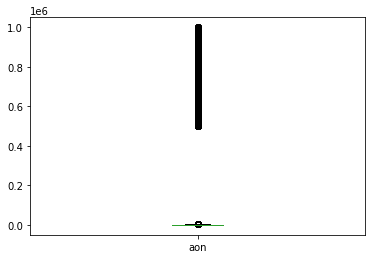

In [24]:
data['aon'].plot.box()

<AxesSubplot:>

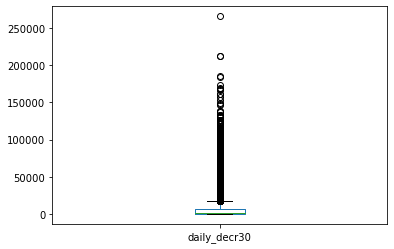

In [25]:
 data['daily_decr30'].plot.box()

In [26]:
# Checking the skewness
ds.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
payback30     

In [27]:
#Handling the Outliers.Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(ds))
z
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209580, 209581, 209586], dtype=int64), array([15, 15, 30, ..., 28,  3, 27], dtype=int64))


In [28]:
# lets check the presence of outlier
print('shape before remooving the outliers:',ds.shape)
dsnew=ds[(z<3).all(axis=1)]

print('shape after remooving the outliers:',dsnew.shape)
# here 36 rows will be droped

shape before remooving the outliers: (209593, 31)
shape after remooving the outliers: (167868, 31)


In [29]:
dsnew

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228330  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  \
0       ...              0             0            2            12   
1       ...              0             0            1            12   
2       ...              0             0            1             6   
3       ...              0             0            2            12   
4       ...              0             0            7            42   
...     ...            ...           ...          ...           ...   
209588  ...              0             0            2            12   
209589  ...              0             0            3            18   
209590  ...              0             0            4            42   
209591  ...              1             0            2            18   
209592  ...              0             0            2            18   

        maxamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                   6.0          2.0            12                6   
1                  12.0          1.0            12               12   
2                   6.0          1.0             6                6   
3                   6.0          2.0            12                6   
4                   6.0          7.0            42                6   
...                 ...          ...           ...              ...   
209588              6.0          2.0            12                6   
209589              6.0          3.0            18                6   
209590             12.0          6.0            54               12   
209591             12.0          3.0            24               12   
209592             12.0          2.0            18               12   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0.000000  10.500000  
209592   0.000000   0.000000  

[167868 rows x 31 columns]

In [30]:
# Checking the skewness after removing outliers
dsnew.skew()

label                   -2.121859
aon                      0.955714
daily_decr30             1.969141
daily_decr90             2.081419
rental30                 2.201402
rental90                 2.249166
last_rech_date_ma        3.074822
last_rech_date_da       10.346796
last_rech_amt_ma         2.112601
cnt_ma_rech30            1.192453
fr_ma_rech30             2.006986
sumamnt_ma_rech30        1.644061
medianamnt_ma_rech30     2.313703
medianmarechprebal30    10.563676
cnt_ma_rech90            1.334656
fr_ma_rech90             1.979431
sumamnt_ma_rech90        1.712072
medianamnt_ma_rech90     2.356073
medianmarechprebal90     3.663659
cnt_da_rech30           50.699810
fr_da_rech30             0.000000
cnt_da_rech90            6.932537
fr_da_rech90             0.000000
cnt_loans30              1.495907
amnt_loans30             1.470063
maxamnt_loans30         52.689382
cnt_loans90              1.734446
amnt_loans90             1.720364
maxamnt_loans90          2.629874
payback30     

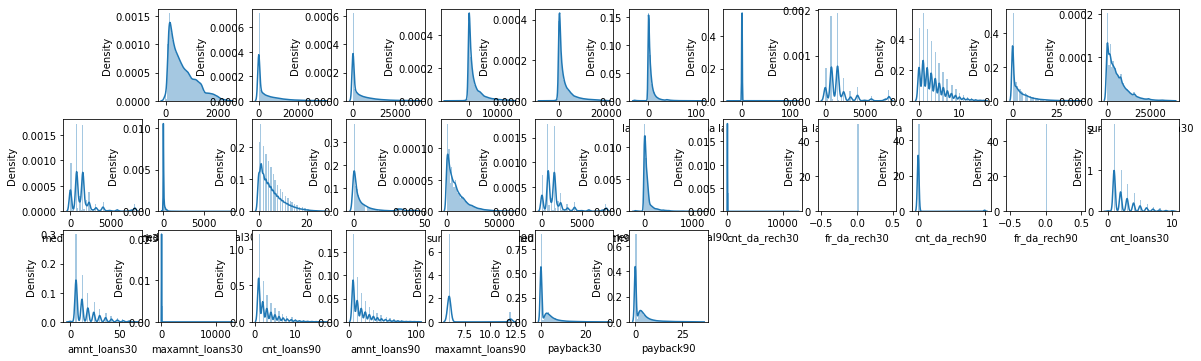

In [31]:
collist=dsnew.columns.values
ncol=12
nrows=10
plt.figure(figsize=(20,20))
for i in range (1, len(collist)):
          plt.subplot(nrows,ncol,i+1)
          sns.distplot(dsnew[collist[i]])

we can see from the above graphs there are high skweness in the bellow variables: 
last_rech_date_da ,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,cnt_da_rech90 

In [32]:
dsnew

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228330  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  \
0       ...              0             0            2            12   
1       ...              0             0            1            12   
2       ...              0             0            1             6   
3       ...              0             0            2            12   
4       ...              0             0            7            42   
...     ...            ...           ...          ...           ...   
209588  ...              0             0            2            12   
209589  ...              0             0            3            18   
209590  ...              0             0            4            42   
209591  ...              1             0            2            18   
209592  ...              0             0            2            18   

        maxamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                   6.0          2.0            12                6   
1                  12.0          1.0            12               12   
2                   6.0          1.0             6                6   
3                   6.0          2.0            12                6   
4                   6.0          7.0            42                6   
...                 ...          ...           ...              ...   
209588              6.0          2.0            12                6   
209589              6.0          3.0            18                6   
209590             12.0          6.0            54               12   
209591             12.0          3.0            24               12   
209592             12.0          2.0            18               12   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0.000000  10.500000  
209592   0.000000   0.000000  

[167868 rows x 31 columns]

In [33]:
# Segregatting the data into features and target variable
x=dsnew.drop(columns=['label'])
y=dsnew['label']

In [34]:
x.shape

(167868, 30)

In [35]:
y.shape

(167868,)

In [36]:
#Reducing the skweness from all the coulmns using power transfromation method
from sklearn.preprocessing import power_transform
ds_new=power_transform(x)
ds_new=pd.DataFrame(ds_new,columns=x.columns)

In [37]:
ds_new.skew()

aon                      0.311441
daily_decr30            -1.950344
daily_decr90            -2.079191
rental30                 0.190853
rental90                 0.213551
last_rech_date_ma        0.120901
last_rech_date_da      -60.067076
last_rech_amt_ma        -0.189289
cnt_ma_rech30           -0.024559
fr_ma_rech30             0.143126
sumamnt_ma_rech30       -0.457624
medianamnt_ma_rech30    -0.317423
medianmarechprebal30     1.968011
cnt_ma_rech90           -0.028280
fr_ma_rech90             0.144744
sumamnt_ma_rech90       -0.364979
medianamnt_ma_rech90    -0.179880
medianmarechprebal90     0.963182
cnt_da_rech30            9.806430
fr_da_rech30             0.000000
cnt_da_rech90            6.932537
fr_da_rech90             0.000000
cnt_loans30              0.090152
amnt_loans30            -0.004777
maxamnt_loans30         -1.011709
cnt_loans90              0.202108
amnt_loans90             0.132894
maxamnt_loans90          2.629874
payback30                0.330761
payback90     

In [38]:
ds_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167868 entries, 0 to 167867
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   aon                   167868 non-null  float64
 1   daily_decr30          167868 non-null  float64
 2   daily_decr90          167868 non-null  float64
 3   rental30              167868 non-null  float64
 4   rental90              167868 non-null  float64
 5   last_rech_date_ma     167868 non-null  float64
 6   last_rech_date_da     167868 non-null  float64
 7   last_rech_amt_ma      167868 non-null  float64
 8   cnt_ma_rech30         167868 non-null  float64
 9   fr_ma_rech30          167868 non-null  float64
 10  sumamnt_ma_rech30     167868 non-null  float64
 11  medianamnt_ma_rech30  167868 non-null  float64
 12  medianmarechprebal30  167868 non-null  float64
 13  cnt_ma_rech90         167868 non-null  float64
 14  fr_ma_rech90          167868 non-null  float64
 15  

In [39]:
ds_new

aon  daily_decr30  daily_decr90  rental30  rental90  \
0      -0.710895      0.582639      0.554893 -0.621347 -0.614060   
1       0.262515      1.310560      1.255651  0.696909  0.438474   
2      -0.095405      0.238771      0.219856 -0.317882 -0.382003   
3      -0.794161     -0.991012     -0.986595 -0.652698 -0.656418   
4       0.696065     -0.525267     -0.526674 -0.237260 -0.316380   
...          ...           ...           ...       ...       ...   
167863 -0.385562     -0.522931     -0.524377 -0.241146 -0.319540   
167864  0.917406     -0.876028     -0.872622  0.005779 -0.119160   
167865  0.811318      1.296817      1.245233  1.399031  1.737628   
167866  1.943548      1.328212      1.276421 -0.529225 -0.353874   
167867  1.720798      0.769287      0.738782 -0.496372 -0.474576   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0               -0.367192          -0.099204          0.180696      -0.230448   
1                1.422337          -0.099204          1.748495      -0.764264   
2               -0.245593          -0.099204          0.180696      -0.764264   
3                3.133152          -0.099204         -0.221105      -1.617241   
4               -0.129519          -0.099204          0.579097       1.176781   
...                   ...                ...               ...            ...   
167863          -0.496645          -0.099204          1.243933       0.164814   
167864          -0.129519          -0.099204         -0.368033       0.481204   
167865          -0.245593          -0.099204          0.180696       0.746255   
167866          -0.367192           5.280233         -0.368033       0.746255   
167867           0.788709          -0.099204          2.166335      -0.230448   

        fr_ma_rech30  ...  cnt_da_rech90  fr_da_rech90  cnt_loans30  \
0           1.699329  ...      -0.141366           0.0     0.100837   
1          -1.097830  ...      -0.141366           0.0    -0.965789   
2          -1.097830  ...      -0.141366           0.0    -0.965789   
3          -1.097830  ...      -0.141366           0.0     0.100837   
4           0.179852  ...      -0.141366           0.0     1.720692   
...              ...  ...            ...           ...          ...   
167863      0.179852  ...      -0.141366           0.0     0.100837   
167864     -0.246827  ...      -0.141366           0.0     0.694726   
167865      1.120434  ...      -0.141366           0.0     1.080235   
167866      0.653092  ...       7.073841           0.0     0.100837   
167867     -0.246827  ...      -0.141366           0.0     0.100837   

        amnt_loans30  maxamnt_loans30  cnt_loans90  amnt_loans90  \
0          -0.015431        -0.186115    -0.096406     -0.115362   
1          -0.015431         2.063895    -1.101462     -0.115362   
2          -0.968117        -0.186115    -1.101462     -1.153178   
3          -0.015431        -0.186115    -0.096406     -0.115362   
4           1.707270        -0.186115     1.375232      1.301300   
...              ...              ...          ...           ...   
167863     -0.015431        -0.186115    -0.096406     -0.115362   
167864      0.547539        -0.186115     0.452188      0.407421   
167865      1.707270         2.063895     1.232677      1.519376   
167866      0.547539         2.063895     0.452188      0.740048   
167867      0.547539         2.063895    -0.096406      0.407421   

        maxamnt_loans90  payback30  payback90  
0              0.000000   1.827413   1.865571  
1              3.130896  -0.898328  -0.974131  
2              0.000000  -0.898328  -0.974131  
3              0.000000  -0.898328  -0.974131  
4              0.000000   0.713420   0.507445  
...                 ...        ...        ...  
167863         0.000000   0.167783  -0.031437  
167864         0.000000   0.167783  -0.031437  
167865         3.130896   1.041917   0.832920  
167866         3.130896  -0.898328   1.421221  
167867         3.130896  

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Count'>

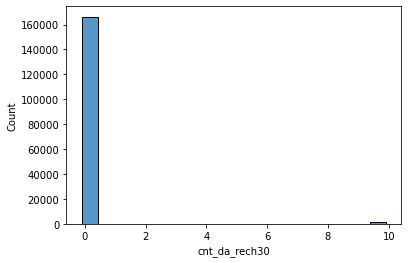

In [40]:
sns.histplot(ds_new['cnt_da_rech30'])

<AxesSubplot:xlabel='cnt_da_rech90', ylabel='Count'>

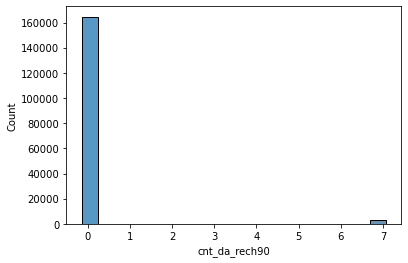

In [41]:
sns.histplot(ds_new['cnt_da_rech90'])

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Count'>

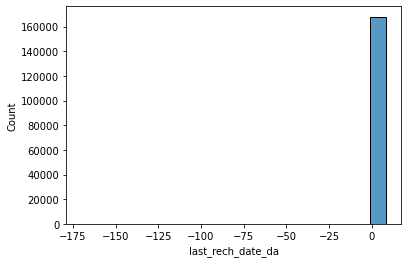

In [42]:
sns.histplot(ds_new['last_rech_date_da'])

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='Count'>

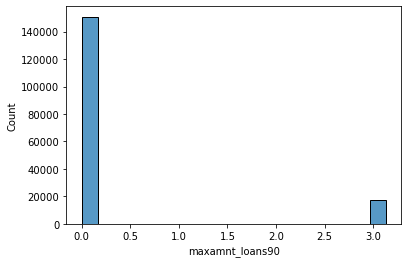

In [43]:
sns.histplot(ds_new['maxamnt_loans90'])

In [44]:
ds_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167868 entries, 0 to 167867
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   aon                   167868 non-null  float64
 1   daily_decr30          167868 non-null  float64
 2   daily_decr90          167868 non-null  float64
 3   rental30              167868 non-null  float64
 4   rental90              167868 non-null  float64
 5   last_rech_date_ma     167868 non-null  float64
 6   last_rech_date_da     167868 non-null  float64
 7   last_rech_amt_ma      167868 non-null  float64
 8   cnt_ma_rech30         167868 non-null  float64
 9   fr_ma_rech30          167868 non-null  float64
 10  sumamnt_ma_rech30     167868 non-null  float64
 11  medianamnt_ma_rech30  167868 non-null  float64
 12  medianmarechprebal30  167868 non-null  float64
 13  cnt_ma_rech90         167868 non-null  float64
 14  fr_ma_rech90          167868 non-null  float64
 15  

In [45]:
# Handiling class imbalance using SMOTE
sm=SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [46]:
y_over.value_counts()

1    145012
0    145012
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

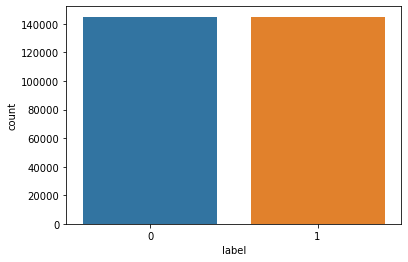

In [47]:
sns.countplot(y_over,data=ds_new)

Now class is balanced

In [48]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_over=scale.fit_transform(x_over)
x_over

array([[-0.67863379,  0.08991764,  0.03862052, ..., -0.28355035,
         6.92066496,  5.73628483],
       [ 0.23995596,  1.98982432,  1.72234486, ...,  3.69306511,
        -0.50132417, -0.52788978],
       [-0.12956764, -0.25730391, -0.27121888, ..., -0.28355035,
        -0.50132417, -0.52788978],
       ...,
       [-0.69238702, -0.55027644, -0.53106595, ..., -0.28355035,
        -0.50132417, -0.52788978],
       [-1.01438927, -0.55023553, -0.53102966, ..., -0.28355035,
        -0.50132417, -0.52788978],
       [-0.61366678, -0.54765706, -0.52874273, ..., -0.28355035,
         3.6973702 ,  3.0158172 ]])

In [49]:
# To find the best random state using logistic Regressor model

maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    mod= LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best accuracy is',maxAccu,'on random state',maxRS)

best accuracy is 0.8422788709084222 on random state 15


In [50]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(117507, 30)
(50361, 30)
(117507,)
(50361,)


70% of the data (117507 rows) will be available for training the model & 30% (50361 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable are categorical values. we can build the classification models. Therefore,evalution criteria will be: Evaluation Matrics : accuracy_score,confusion_matrix,classifcation_report

In [51]:
# Logistic regression Model
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8666428387045532
[[  396  6457]
 [  259 43249]]
              precision    recall  f1-score   support

           0       0.60      0.06      0.11      6853
           1       0.87      0.99      0.93     43508

    accuracy                           0.87     50361
   macro avg       0.74      0.53      0.52     50361
weighted avg       0.83      0.87      0.82     50361



In [52]:
# Gauusian Naive_bayes classifcation Model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.6427394213776534
[[ 5798  1055]
 [16937 26571]]
              precision    recall  f1-score   support

           0       0.26      0.85      0.39      6853
           1       0.96      0.61      0.75     43508

    accuracy                           0.64     50361
   macro avg       0.61      0.73      0.57     50361
weighted avg       0.87      0.64      0.70     50361



In [53]:
# RandomForest classifcation Model
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,random_state=0)
#randomforsetclassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.90774607335041
[[ 3239  3614]
 [ 1032 42476]]
              precision    recall  f1-score   support

           0       0.76      0.47      0.58      6853
           1       0.92      0.98      0.95     43508

    accuracy                           0.91     50361
   macro avg       0.84      0.72      0.77     50361
weighted avg       0.90      0.91      0.90     50361



In [54]:
# Adaboost classifcation Model
ad= AdaBoostClassifier(n_estimators=50)
#Adabosstclassifier(100)----Default
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
ad.score(x_train,y_train)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8984928813963186
[[ 2221  4632]
 [  480 43028]]
              precision    recall  f1-score   support

           0       0.82      0.32      0.46      6853
           1       0.90      0.99      0.94     43508

    accuracy                           0.90     50361
   macro avg       0.86      0.66      0.70     50361
weighted avg       0.89      0.90      0.88     50361



In [55]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8598717261372888
[[ 3543  3310]
 [ 3747 39761]]
              precision    recall  f1-score   support

           0       0.49      0.52      0.50      6853
           1       0.92      0.91      0.92     43508

    accuracy                           0.86     50361
   macro avg       0.70      0.72      0.71     50361
weighted avg       0.86      0.86      0.86     50361



In [56]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(x_train, y_train) 
predclf=clf.predict(x_test)
print(accuracy_score(y_test,predclf))
print(confusion_matrix(y_test,predclf))
print(classification_report(y_test,predclf))

0.7286789380671551
[[ 4111  2742]
 [10922 32586]]
              precision    recall  f1-score   support

           0       0.27      0.60      0.38      6853
           1       0.92      0.75      0.83     43508

    accuracy                           0.73     50361
   macro avg       0.60      0.67      0.60     50361
weighted avg       0.83      0.73      0.77     50361



Based on the results of above models, and capomaring the Accuracy score and other evalution matrics result of recall, precision.
                           Accuracy_Score     
1 LogisticRegression        0.87
2.Gaussian Naive_bayes      0.64
3 DecisionTreeClassifier    0.86  
4 Random Forest Classifier  0.91
5 AdaBoost Classifier       0.90
6.Linear SVC                0.82

Random Forest & AdaBoost classifier have the best accuracy score among the 6 alogorithims used above.To find the best Model for prediction in our case.Lets do cross validation.

# Cross Validation

Cross check the accuracy of the algorithim used above

In [57]:
gnbscores =cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.64129982 0.64070412 0.64046584 0.63920412 0.64441664]
0.641218106992117 0.001739169258022475


In [58]:
lgscores =cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.86510395 0.86572943 0.86602728 0.86626158 0.86620201]
0.8658648505604744 0.0004230274289517283


In [59]:
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.90593912 0.90653482 0.90638589 0.90697882 0.90620439]
0.9064086089427098 0.0003474805246684494


In [60]:
adscores=cross_val_score(ad,x,y,cv=5)
print(adscores)
print(adscores.mean(),adscores.std())

[0.89870138 0.896676   0.8976589  0.89640485 0.897358  ]
0.8973598246431473 0.0008085550816424578


In [61]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.85908739 0.85721094 0.85875975 0.85887469 0.85735561]
0.8582576769542152 0.000803815150071676


In [62]:
clfscores=cross_val_score(clf,x,y,cv=5)
print(clfscores)
print(clfscores.mean(),clfscores.std())

[0.66465122 0.81720975 0.73148865 0.56986269 0.79942215]
0.7165268915520461 0.09103185193588509


It can be observed that the "Random Forest Classifier" algorithim has the almost same accuracy score before and after the cross validation. So the best model with highet accuracy score and best on evalution with other matrix , "Ada Boost" is the best model for predicting the class of mushroom.

# HyperParameter tuning

In [63]:
from sklearn.model_selection import GridSearchCV 
parameter={'max_depth':np.arange(5,10),'criterion':['gini','entropy']}

In [64]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [65]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9])})

In [66]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [67]:
rf_final= RandomForestClassifier(max_depth=20,criterion='gini',max_features='sqrt',random_state=0)
#randomforsetclassifier(100)----Default
rf_final.fit(x_train,y_train)
predrf_final=rf_final.predict(x_test)
rf_final.score(x_train,y_train)
print(accuracy_score(y_test,predrf_final))
print(confusion_matrix(y_test,predrf_final))
print(classification_report(y_test,predrf_final))

0.9088779015508032
[[ 3163  3690]
 [  899 42609]]
              precision    recall  f1-score   support

           0       0.78      0.46      0.58      6853
           1       0.92      0.98      0.95     43508

    accuracy                           0.91     50361
   macro avg       0.85      0.72      0.76     50361
weighted avg       0.90      0.91      0.90     50361



# AUC ROC Curve

In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

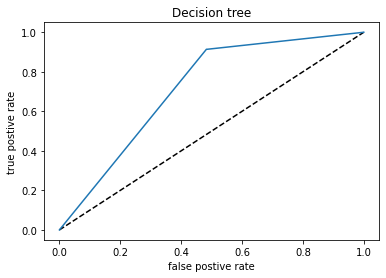

0.7154388807948839

In [69]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Decision tree')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

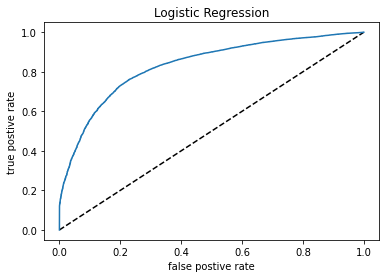

0.5259159917601914

In [70]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

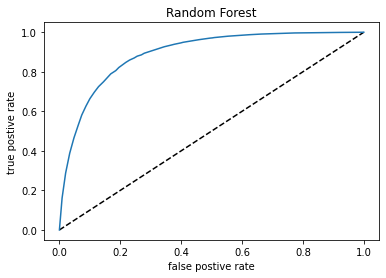

0.7244599720786458

In [71]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Random Forest')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

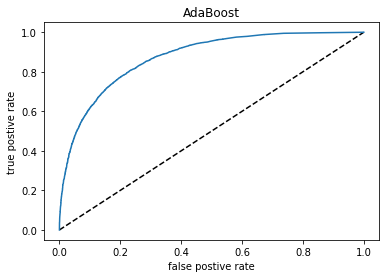

0.6565295924483904

In [72]:
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('AdaBoost')
plt.show()
auc_score=roc_auc_score(y_test,ad.predict(x_test))
auc_score

Key Observations: Random forest model has highest area under the curve. And AUC ROC score is 73%.It means our model can predict 73% effectively.